                                     Jason Secula                                    
                          Applied Thermodynamics [ME 2234]                           
                              Professor Bryan W. Weber                               
                        Vapor-Compression Refrigeration System                       
                                   Evaluating R134a                                  
           
________________________________________________________________________
____State 1________________________________________
           T = -18.0 degC
           P = 2.075630751771039 bar
           h = 1583.5490800763673 kilojoule / kilogram
           s = 6.345230105246182 kilojoule / kelvin / kilogram
____State 2s________________________________________
           T = 178.93065609154155 degC
           P = 26.155989829222275 bar
           h = 1990.146712633061 kilojoule / kilogram
           s = 6.345230105246183 kilojoule / kelvin / kilogram
____S

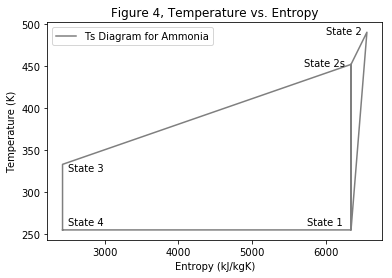

In [10]:
from thermostate import State, Q_, units
from math import pi
import numpy as np
substance1 = 'R22'
#^^ From my notes, P_saturated, at 4 Degrees C, 5.6619 Bar
substance2 = 'R134a'
substance3 = 'ammonia'
#_____________________________________________________________________ Line
print('Jason Secula'.center(85))
print('Applied Thermodynamics [ME 2234] '.center(85))
print('Professor Bryan W. Weber '.center(85))
print('Vapor-Compression Refrigeration System'.center(85))
print(' Evaluating R134a '.center(85))
print('           ')
#_____________________________________________________________________ Line
Pwr_i = Q_(281.3, 'kW').to('J/s')   #Converted from Tons of Refrigerant
Cost_i = (15.225) #In cents/kWh
Cost_f = (18.268) #In Cents/kWh
Q_in = Q_(80,'ton_of_refrigeration').to('J/s')
Pwr = Q_(250, 'kWh')
R_bar = Q_(8.31446,'J/(mol*K)')                 #Mdot Calculations in Book on Page 635
η_c = Q_(0.8,'dimensionless')
#_____________________________________________________________________
#Temp of Room is 2DegreesC Need at least a 20 Degree difference. 
           #The assumption is made that the Refrigerant is a Saturated Vapor at this state. 
           #It's really a two-phase liquid accourding to thermoState.  
T_Evap = Q_(-18,'degC')
x_1 = Q_(1.0,'dimensionless')
st_1 = State(substance3, T=T_Evap, x=x_1)
T_Cndr = Q_(60,'degC')                             
x_3 = Q_(0.0, 'dimensionless') 
st_3 = State(substance3, T=T_Cndr, x=x_3)
#st_4 = State(substance1, T=T_Evap, h=st_3.h) #Th is not supported yet
T_4 = st_1.T
s_4 = st_3.s
h_4 = st_3.h
st_2s = State(substance3, s=st_1.s, p=st_3.p)
#Because we want this to be an effective system, we set the Efficiency of the Compressor to 80%
h_2 = (st_1.h-((st_1.h-st_2s.h)/η_c))
st_2 = State(substance3, h=h_2, p=st_3.p)
#_____________________________________________________________________ Line
#__________________________Calculations_______________________________
#_____________________________________________________________________
mdot = (Q_in/(st_1.h-h_4))
Q_out = mdot*(st_2s.h- st_3.h)
W_comp = (mdot*(st_2s.h-st_1.h)).to('kJ/s')
βeta = (Q_in/W_comp)
eta_c = ((st_2s.h-st_1.h)/(st_2.h-st_1.h))
print ('________________________________________________________________________') 
print ('____State 1________________________________________')
print ('           T = {}'.format(st_1.T.to('degC')))
print ('           P = {}'.format(st_1.p.to('bar')))
print ('           h = {}'.format(st_1.h.to('kJ/kg')))
print ('           s = {}'.format(st_1.s.to('kJ/K/kg')))
print ('____State 2s________________________________________')
print ('           T = {}'.format(st_2s.T.to('degC')))
print ('           P = {}'.format(st_2s.p.to('bar')))
print ('           h = {}'.format(st_2s.h.to('kJ/kg')))
print ('           s = {}'.format(st_2s.s.to('kJ/K/kg')))
print ('____State 2________________________________________')
print ('           T = {}'.format(st_2.T.to('degC')))
print ('           P = {}'.format(st_2.p.to('bar')))
print ('           h = {}'.format(st_2.h.to('kJ/kg')))
print ('           s = {}'.format(st_2.s.to('kJ/K/kg')))
print ('____State 3________________________________________')
print ('           T = {}'.format(st_3.T.to('degC')))
print ('           P = {}'.format(st_3.p.to('bar')))
print ('           h = {}'.format(st_3.h.to('kJ/kg')))
print ('           s = {}'.format(st_3.s.to('kJ/K/kg')))
print ('____State 4________________________________________')
print ('           T = {}'.format(T_4.to('degC')))
print ('           h = {}'.format(h_4.to('kJ/kg')))
print ('           s = {}'.format(s_4.to('kJ/K/kg')))
print ('______________________________________________________________________________________________________') 
print (' mdot  is {} '.format(mdot).center(85))
print (' Q_in  is {} '.format(Q_in.to('ton_of_refrigeration')).center(85))
print (' Q_out is {} '.format(Q_out.to('ton_of_refrigeration')).center(85))
print (' W_c   is {} '.format(W_comp.to('kW')).center(85))
print (' η_c   is {} '.format(eta_c).center(85))
print (' β     is {} '.format(βeta.to('kJ/kJ')).center(85))
print ('______________________________________________________________________________________________________')  
print ('           ')

T1B = []
T2B = []
T2Bs = []
T3B = []
T4B = []
T4Bs = []

S1 = []
S2 = []
S2s = []
S3 = []
S4 = []
S4s = []
       
T4.append(T_4.magnitude)
T1.append(st_1.T.magnitude)
T2s.append(st_2s.T.magnitude)
T2.append(st_2.T.magnitude)
T3.append(st_3.T.magnitude)
T4s.append(T_4s.magnitude)
        
S4.append(s_4.magnitude)
S1.append(st_1.s.magnitude)
S2s.append(st_2s.s.magnitude)
S2.append(st_2.s.magnitude)
S3.append(st_3.s.magnitude)
T4s.append(T_4s.magnitude)
       
T =[T4, T1, T2s, T1, T2,T2s, T3, T4]
s =[S4, S1, S2s, S1, S2,S2s, S3, S4]
%matplotlib inline
import matplotlib.pyplot as plt
fig, Ts_ax = plt.subplots()
Ts_ax.plot(s, T, label='Ts Diagram for Ammonia', color='C7')
Ts_ax.set_xlabel('Entropy (kJ/kgK)')
Ts_ax.set_ylabel('Temperature (K)')
plt.title('Figure 4, Temperature vs. Entropy')
plt.text(2500, 261, r'State 4') #http://matplotlib.org/users/pyplot_tutorial.html  'r' signifies "Raw String"
plt.text(5750, 261, r'State 1')
plt.text(5705, 450, r'State 2s')
plt.text(6000, 488, r'State 2')
plt.text(2500, 325, r'State 3')
lines, labels = Ts_ax.get_legend_handles_labels()
Ts_ax.legend(lines, labels, loc='best');